# Monte Carlo estimation

In [1]:
!pip -q install gym

import numpy as np
import matplotlib.pyplot as plt
import gym
import itertools
from MonteCarlo import *

In [2]:
env = gym.make('Blackjack-v1', natural=False, sab=False)

Observation state space: (32, 11, 2)

## Monte Carlo estimation of value functions

In [3]:
player_sum_range = range(32)       
dealer_card_range = range(1, 11)   
usable_ace_range = [True, False]

states = list(itertools.product(player_sum_range, dealer_card_range, usable_ace_range))
print(f"Number of states: {len(states)}")

Number of states: 640


In [4]:
def sample_fn(policy, env, max_len):
    def sample():
        trajectory = {}
        obs, _ = env.reset()
        for t in range(max_len):
            action = policy(obs)
            obs_, reward, done, info = env.step(action)[:4]
            trajectory[(obs, action)] = reward
            obs = obs_
            if done:
                break
        return trajectory
    return sample

In [5]:
class MonteCarloValue:
    """
    Monte Carlo method for estimating the value functions
    """
    def __init__(self, states, sample):
        """ 
        states: a list of possible states
        sample: a function when called sample() returns a trajectory of the form
        {(state1, action1): reward1, (state2, action2): reward2,...}
        """
        self.states = states
        self.sample = sample
        
    def estimate(self, max_iter, gamma=1, every_visit=False):
        """ 
        Estimates the value function
        max_iter: number of trajectories used
        gamma: discount factor
        every_visit: Uses every visit Monte Carlo if True, else uses first visit Monte Carlo
        """
        value = {state: 0 for state in self.states}
        count = {state: 0 for state in self.states}
        for i in range(max_iter):
            episode = self.sample()
            states = list([state[0] for state in episode.keys()])
            cum_reward = 0
            for t, (state, reward) in enumerate(list(episode.items())[::-1]):
                state = state[0]
                t = len(episode) - t - 1
                cum_reward += gamma * reward
                if every_visit or state not in states[:t]:
                    count[state] += 1
                    value[state] = value[state] + (cum_reward - value[state]) / count[state]
        return value

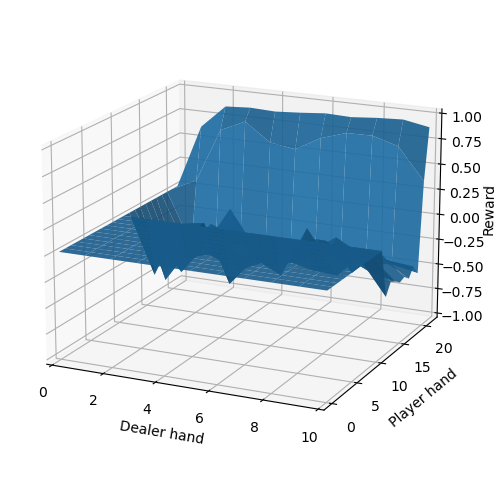

In [8]:
policy = lambda obs: 1 if obs[0] < 20 else 0
sample = sample_fn(policy, env, 10)
montecarlo = MonteCarloValue(states, sample)
values = montecarlo.estimate(50000, every_visit=True)
plot_values(values)

## Monte Carlo estimation of q-value function

In [8]:
player_sum_range = range(32)       
dealer_card_range = range(1, 11)   
usable_ace_range = [True, False]
actions = [0, 1]

In [9]:
class MonteCarloQValue:
    """
    Monte Carlo method for estimating the Q value functions.
    The implementation is similar to the case of value function, except for small twists in the estimate function
    """
    def __init__(self, states, actions, sample):
        """ 
        states: a list of possible states
        actions: a list of possible actions
        sample: a function when called sample() returns a trajectory of the form
        {(state1, action1): reward1, (state2, action2): reward2,...}
        """
        self.states = states
        self.actions = actions
        self.sample = sample
        
    def estimate(self, max_iter, gamma=1, every_visit=False):
        """ 
        Estimates the Q value function
        max_iter: number of trajectories used
        gamma: discount factor
        every_visit: Uses every visit Monte Carlo if True, else uses first visit Monte Carlo
        """
        value = {state: {action: 0 for action in self.actions} for state in self.states}
        count = {state: {action: 0 for action in self.actions} for state in self.states}
        for i in range(max_iter):
            episode = self.sample()
            cum_reward = 0
            for t, (state_action, reward) in enumerate(list(episode.items())[::-1]):
                state, action = state_action
                t = len(episode) - t - 1
                cum_reward += gamma * reward
                if every_visit or state not in self.states[:t]:
                    count[state][action] += 1
                    value[state][action] = value[state][action] + (cum_reward - value[state][action]) / count[state][action]            
        return value

In [10]:
policy = lambda obs: 1 if obs[0] < 20 else 0
sample = sample_fn(policy, env, 10)
montecarlo = MonteCarloQValue(states, actions, sample)
qvalues = montecarlo.estimate(50000, every_visit=True)

In [11]:
qvalues

{(0, 1, True): {0: 0, 1: 0},
 (0, 1, False): {0: 0, 1: 0},
 (0, 2, True): {0: 0, 1: 0},
 (0, 2, False): {0: 0, 1: 0},
 (0, 3, True): {0: 0, 1: 0},
 (0, 3, False): {0: 0, 1: 0},
 (0, 4, True): {0: 0, 1: 0},
 (0, 4, False): {0: 0, 1: 0},
 (0, 5, True): {0: 0, 1: 0},
 (0, 5, False): {0: 0, 1: 0},
 (0, 6, True): {0: 0, 1: 0},
 (0, 6, False): {0: 0, 1: 0},
 (0, 7, True): {0: 0, 1: 0},
 (0, 7, False): {0: 0, 1: 0},
 (0, 8, True): {0: 0, 1: 0},
 (0, 8, False): {0: 0, 1: 0},
 (0, 9, True): {0: 0, 1: 0},
 (0, 9, False): {0: 0, 1: 0},
 (0, 10, True): {0: 0, 1: 0},
 (0, 10, False): {0: 0, 1: 0},
 (1, 1, True): {0: 0, 1: 0},
 (1, 1, False): {0: 0, 1: 0},
 (1, 2, True): {0: 0, 1: 0},
 (1, 2, False): {0: 0, 1: 0},
 (1, 3, True): {0: 0, 1: 0},
 (1, 3, False): {0: 0, 1: 0},
 (1, 4, True): {0: 0, 1: 0},
 (1, 4, False): {0: 0, 1: 0},
 (1, 5, True): {0: 0, 1: 0},
 (1, 5, False): {0: 0, 1: 0},
 (1, 6, True): {0: 0, 1: 0},
 (1, 6, False): {0: 0, 1: 0},
 (1, 7, True): {0: 0, 1: 0},
 (1, 7, False): {0: 0, 1: